<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Convolutional_Neural_Network_CNN/CNN_mnist_Modeling_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow

tensorflow.__version__

'2.13.0'

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape = (28, 28, 1)))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3),
                        strides =(1,1), padding='valid',
                        activation = 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=16, kernel_size=(3,3),
                        strides =(1,1), padding='valid',
                        activation = 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3),
                        strides =(1,1), padding='valid',
                        activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
Total params: 5888 (23.00 KB)
Trainable params: 5888 (

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, activation = 'relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 flatten_3 (Flatten)         (None, 288)              

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
%%time
Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 13s 7ms/step - loss: 0.5507 - accuracy: 0.8248 - val_loss: 0.1754 - val_accuracy: 0.9482
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1959 - accuracy: 0.9389 - val_loss: 0.1105 - val_accuracy: 0.9668
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1393 - accuracy: 0.9567 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9632 - val_loss: 0.0760 - val_accuracy: 0.9777
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1022 - accuracy: 0.9678 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0930 - accuracy: 0.9712 - val_loss: 0.0786 - val_accuracy: 0.9781
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9729 - val_loss: 0.0573 - val_accuracy: 0.982

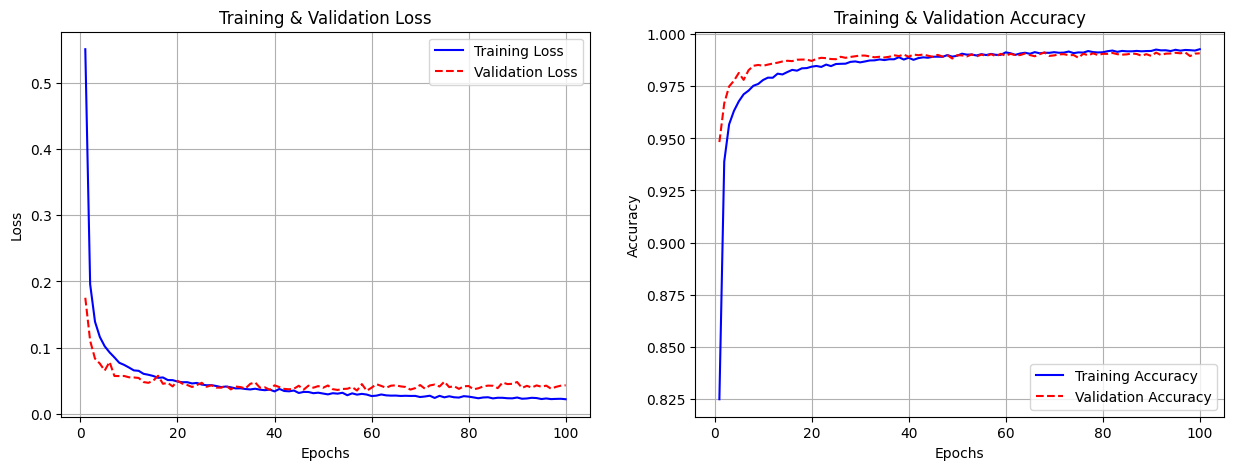

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_mnist.history['loss']) + 1)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.02694
Accuracy = 0.99220
